In [30]:
import sys
import tensorflow as tf
import platform
import pandas as pd
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2-arm64-arm-64bit
Tensor Flow Version: 2.9.0
Python 3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
SciPy 1.10.1
GPU is available


In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
len(train_labels)

60000

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
len(test_labels)

10000

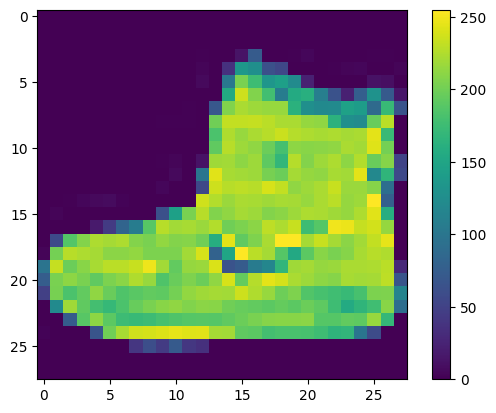

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

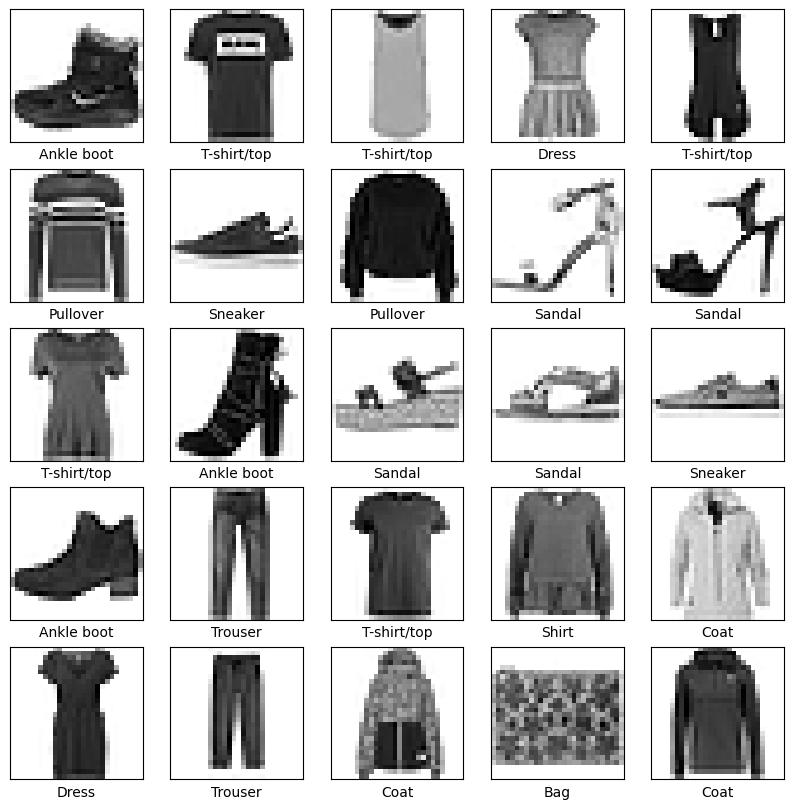

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1


2023-02-26 16:27:56.342998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 16:27:56.343247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-02-26 16:28:03.346301: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 16:28:03.473369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4936 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3732 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3352 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3128 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2948 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2790 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2494 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2389 - accurac

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2023-02-26 16:30:14.386800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3478 - accuracy: 0.8818 - 1s/epoch - 4ms/step

Test accuracy: 0.8818000555038452


In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

139/313 [============>.................] - ETA: 0s

2023-02-26 16:31:57.331764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [28]:
predictions[0]

array([1.06801195e-07, 1.78616538e-10, 1.33961713e-08, 3.08914583e-09,
       8.25536048e-08, 1.48938643e-02, 9.88627278e-08, 2.05288548e-02,
       4.52547511e-08, 9.64576900e-01], dtype=float32)

In [33]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

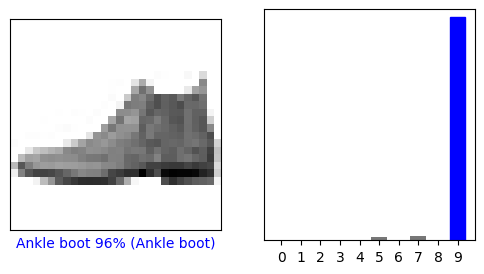

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

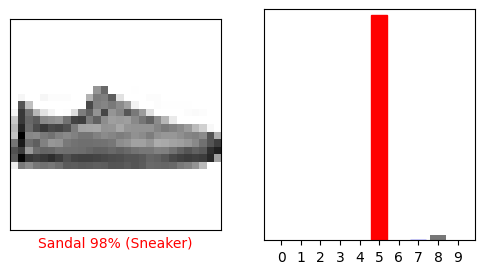

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

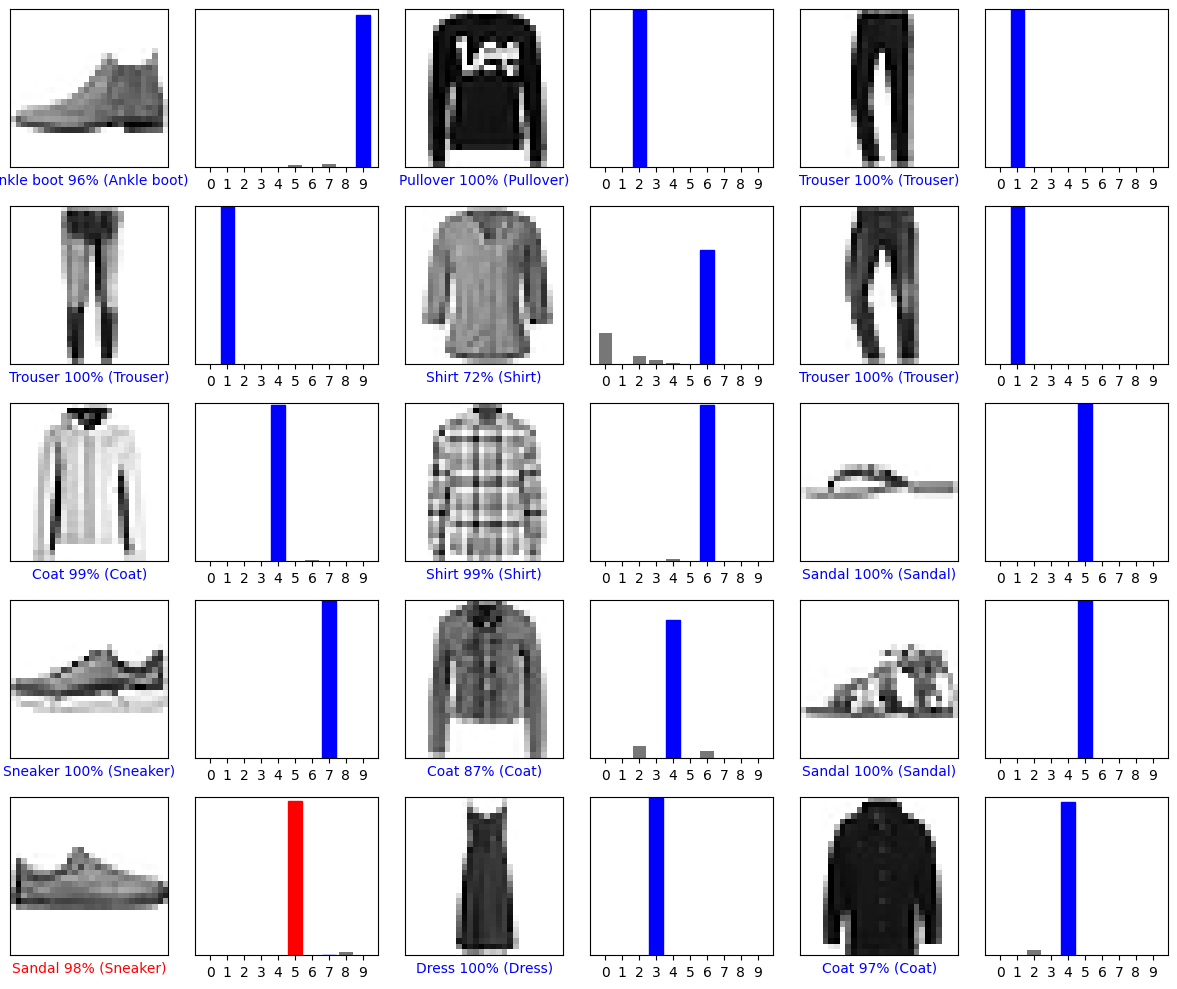

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [39]:
img = test_images[1]

print(img.shape)

(28, 28)


In [40]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 325ms/step
[[2.0775467e-05 6.4229873e-17 9.9902916e-01 5.4899321e-09 6.9303793e-04
  3.2307286e-12 2.5699937e-04 2.5246648e-19 3.8631581e-11 3.3848365e-14]]


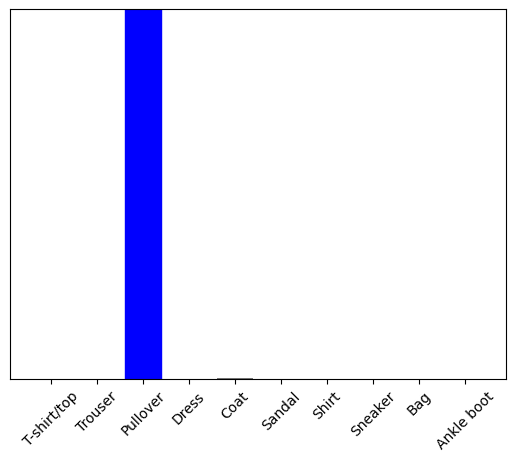

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [43]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

In [44]:
predictions

array([[1.06801195e-07, 1.78616538e-10, 1.33961713e-08, ...,
        2.05288548e-02, 4.52547511e-08, 9.64576900e-01],
       [2.07754674e-05, 6.42295356e-17, 9.99029160e-01, ...,
        2.52466483e-19, 3.86314800e-11, 3.38481887e-14],
       [4.89949628e-08, 1.00000000e+00, 1.61186498e-11, ...,
        1.59931656e-23, 2.85823036e-12, 4.97551423e-23],
       ...,
       [5.14134066e-04, 1.23489670e-07, 5.65841801e-05, ...,
        1.87442603e-10, 9.98037279e-01, 7.66203507e-13],
       [2.65627875e-08, 9.99948025e-01, 8.53013926e-09, ...,
        9.62033419e-17, 1.06272644e-08, 6.43285609e-15],
       [2.57312422e-06, 2.40412246e-09, 5.09862684e-06, ...,
        1.03463314e-03, 4.42001146e-05, 1.52593966e-05]], dtype=float32)

In [45]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [47]:
list(test_labels)

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 4,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 3,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 9,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 6,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 6,
 9,
 2,
 6,
 8,
 6,
 4,
 2,
 2,


In [52]:
prediction_labels = []

for prediction in predictions:
    lab = np.argmax(prediction)
    prediction_labels.append(lab)

In [53]:
prediction_labels

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 4,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 5,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 4,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 4,


In [61]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [62]:
cm = confusion_matrix(test_labels, prediction_labels)

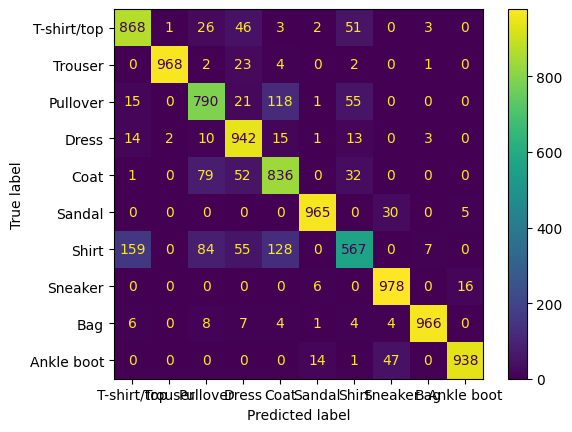

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()

plt.show()